# Parameter Inference in Astronomy

Below we load some handy libraries for our tutorial and configure a bit to make plots prettier.

In [1]:
## Import packages
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## Matplotlib settings
plt.rcParams['lines.linewidth'] = 1.5
plt.rcParams['font.size'] = 16
plt.rcParams['axes.grid'] = True
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['grid.alpha'] = 0.4
plt.rcParams['figure.figsize'] = (8, 8)

## 3. Weak-lensing peak counts: an example in N-dimensional case

In this section, we will see how to carry out parameter inference with multi-dimensional data and parameter vectors. 
We will study weak lensing as an example. 

### Context

Weak gravitation lensing describes the fact that light emitted from distant galaxies is bent by massive structures that it meets on the trajectory. 
It is espectially sensible to two cosmological parameters: the abundance $\Omega_\mathrm{m}$ and the fluctuation $\sigma_8$ of matters.

Peak are local maxima from the lensing maps.
Different cosmological parameters yield different massive structures, 
which affect the peak number counts.
The data of peak counts can then be used to estimate (or more formally, to "constrain") parameters $\Omega_\mathrm{m}$ and $\sigma_8$.
And this is what we are going to do in this section.

The data for this section can be found in the folder `data`.
They are part of the data taken from [this paper](https://arxiv.org/abs/1506.01076).

### Likelihood in a high dimensional data space

Let's recall first what a likelihood is.
A likelihood $\mathcal{L}(\boldsymbol{\theta}|\boldsymbol{x}_\mathrm{obs})$ is a function of parameters $\boldsymbol{\theta}$ given an observation $\boldsymbol{x}_\mathrm{obs}$. 
It is defined as $\mathcal{L}(\boldsymbol{\theta}|\boldsymbol{x}_\mathrm{obs}) = P(\boldsymbol{x}_\mathrm{obs}|\boldsymbol{\theta})$, 
meaning the value of the **stochastic** model $P(\boldsymbol{x}|\boldsymbol{\theta})$ evaluated at $\boldsymbol{x}=\boldsymbol{x}_\mathrm{obs}$, under parameter $\boldsymbol{\theta}$.
We put parameters and data in bold because they are vectors now.

Why is the model stochastic? 
Because the Universe itself is considered as a random realization; 
also because in astronomy, we often need to account for 
undesired astrophysical features, observational effects, instrumental errors, etc.
These are often stochastic.

This means that, to evaluate the likelihood, we need models for all these.
We need to know the shape of $P$.
This task is already not easy in 1-D case. 
In principle, one can run simulations or collect data of similar nature to estimate this distribution. 
However, even when it's possible to do so, it's very hard to avoid biases. 
In multi-dimensional cases, it's even more difficult 
as the required number of samples soon becomes too big to be done when the dimension increases. 
This is called the _curse of dimensionality_.

That's why we often propose theoretical or analytical formalisms as a model. 
This is what we have done implicitly in Section 2, 
where the peculiar velocity $v_\mathrm{p}$ has been modelled as following a Gaussian distribution. 
In general, although the model doesn't have to be Gaussian, Gaussian distributions are still the most commonly chosen models due to the central limit theorem.

### Gaussian distribution in multi-dimensional space

Let's take a look at the Gaussian distributions. 
Let $\boldsymbol{x}$ be an variable vector of $d$ dimensions,
$\boldsymbol{\mu}$ the mean of $\boldsymbol{x}$, 
and $\boldsymbol{C}$ the covariance between all components of $\boldsymbol{x}$.
Then we say $\boldsymbol{x}$ follows a _multivariate Gaussian distribution_ if its pdf is described by

$$P(\boldsymbol{x}|\boldsymbol{\mu}, \boldsymbol{C}) = \frac{1}{\sqrt{(2\pi)^d} \cdot|\det\boldsymbol{C}|} 
\exp\bigg(-\frac{1}{2}\chi^2\bigg)$$

with

$$\chi^2 \equiv (\boldsymbol{x} - \boldsymbol{\mu})^T \boldsymbol{C}^{-1} 
(\boldsymbol{x} - \boldsymbol{\mu})$$

where $\boldsymbol{C}^{-1}$ is the inverse covariance and $\mathrm{T}$ the transpose operator. 
The quantity $\chi^2$ is pronounced as "chi-squared".
It summarizes **how far $\boldsymbol{x}$ is deviated from the mean**.
If you don't see this clearly, try again by supposing $\boldsymbol{C}$ diagonal.

That means, if we assume a Gaussian model for our $P(\boldsymbol{x}|\boldsymbol{\theta})$, 
then the only remaining thing to do is to estimate the mean and the covariance 
for, ideally, all $\boldsymbol{\theta}$ of interest.
So, we are rather talking about $\boldsymbol{\mu}(\boldsymbol{\theta})$ and $\boldsymbol{C}(\boldsymbol{\theta})$.

### Modelling by a simulator

For our cosmological analysis with weak lensing, we will model peak counts with data provided by a simulator.
This simulator reads cosmological parameters as inputs and generates a lensing map before counting peaks.
Thus, with many realizations, it should be able to reconstruct $P(\boldsymbol{x}|\boldsymbol{\theta})$ by itself.

However, here we choose not to go down this road.
Instead, we will approximate $P(\boldsymbol{x}|\boldsymbol{\theta})$ with a multivariate Gaussian.
The data from the simulator will only be used for estimating 
$\boldsymbol{\mu}(\boldsymbol{\theta})$ and $\boldsymbol{C}(\boldsymbol{\theta})$.
The goal is to use this dataset to constrain cosmological parameters.

In the following, we will consider a 2-dimensional parameter space, composed of `Omega_m` and `sigma_8`.
Our data vector is composed of peak counts in 5 signal-to-noise ratio bins, so 5-dimensional.
To simplify, we will only carry out a Bayesian analysis.
This is also more common for parameter inference in cosmology.

### 3.1 Mean estimate

Let's start smoothly with only one parameter set: `Omega_m = 0.3` and `sigma_8 = 0.78`.
The corresponding file contains a data matrix of shape (1000, 5).
These are 1000 realizations of 5-D data vector $\boldsymbol{x}$.
Can you calculate $\boldsymbol{\mu}$ in this case?

**TODO: Calculate `mu`, the 5-D mean over 1000 data vectors**

In [2]:
## Define parameters 
Omega_m = 0.3
sigma_8 = 0.78

## Define file name
name = 'data/dataMat_OmegaM%.3f_sigEig%.3f.npy' % (Omega_m, sigma_8)

## Load data
data = np.load(name)

## Check the shape of the data
print(data.shape)

## Take a look
print(data)

## TODO: Add your code here for mean





## End of TODO

(1000, 5)
[[362.  82.  36.  22.  12.]
 [339.  96.  33.  12.  15.]
 [323. 100.  42.  14.   8.]
 ...
 [304.  96.  38.  16.  11.]
 [309.  91.  48.  15.   8.]
 [321.  99.  31.  15.  17.]]


### 3.2 Covariance estimate

Now please estimate the covariance `cov` from the data matrix. 
We will use `np.cov` with the option `ddof=1`. 
Why? Type `np.cov?` to understand.

We will also estimate the inverse covariance `inv_cov` from `inv_cov`.
We will use `np.linalg.inv` this time.
After the calculation, please multiply your result by `(N-d-2)/(N-1)`, 
where `N = 1000` and `d = 5`.
This scaling is for debiasing the inverse estimate. 

**TODO:**
- **Calculate `cov` with `ddof=1`**
- **Calculate `inv_cov` with scaling factor applied**

In [3]:
## TODO: Add your code here for covariance





## End of TODO

## Define number of realizations
N = 1000

## Define dimension of data vector
d = 5

## TODO: Add your code here for inverse





## End of TODO

### 3.3 Chi-squred and likelihood

Now please calculate the chi-squared and the likelihood.
You will need the observation `x_obs` and it is already provided.
You will also need `np.dot`, `np.linalg.det`, and `np.fabs`.
You can ignore the constant factor in the likelihood.

**TODO:**
- **Calculate `chi_sq`**
- **Calculate `likelihood`**

In [4]:
## Read observation from file
x_obs = np.load('data/x_obs.npy')

## Print
print(x_obs)

## TODO: Add your code here for covariance





## End of TODO

## TODO: Add your code here for covariance





## End of TODO

[339.  89.  43.  11.  16.]


### 3.4 Make a function

Complete the following prototype:
```
def compute_likelihood(Omega_m, sigma_8):
    ...
    return likelihood
```

**TODO: Implement `compute_likelihood`**

In [5]:
def compute_likelihood(Omega_m, sigma_8):
    ## TODO: Add your code here
    
    pass
    
    
    
    ## End of TODO

### 3.5 Show me the likelihood!

We are going to visualize what you have just calculated. 
Please read the comments of the following code carefully.
After you understand it, add what you have implemented.

**TODO:** 
- **Understand the code and complete the likelihood**
- **Run the code, then rerun it again with `path = 0.005` (it might take a while)**

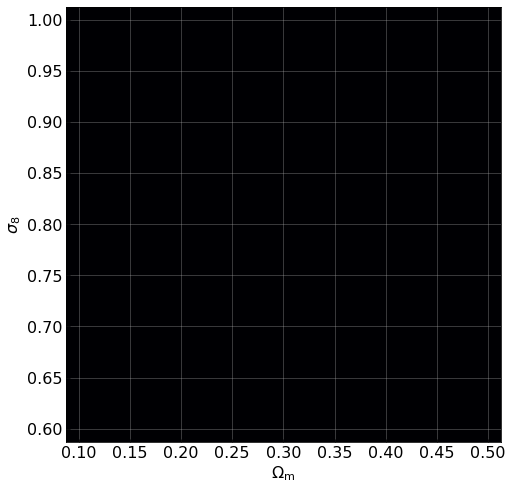

In [6]:
## TODO: Change `path` to `0.005` after a success run

path = 0.025



## End of TODO

## Define Omega_m and sigma_8 arrays
Omega_m_arr = np.arange(0.1, 0.5000001, path)
sigma_8_arr = np.arange(0.6, 1.0000001, path)

## Make a grid
Omega_m_grid, sigma_8_grid = np.meshgrid(Omega_m_arr, sigma_8_arr)

## Initialize the likelihood grid with 0
like_grid = np.zeros_like(Omega_m_grid, dtype=float)

## Loop over y-axis (sigma_8)
for j, sigma_8 in enumerate(sigma_8_arr):
    
    ## Loop over x-axis (Omega_m)
    for i, Omega_m in enumerate(Omega_m_arr):
        
        ## The code will execute everything in `try` until an error is met.
        ## If no error occurs, it just leaves `try` and skips `except`.
        try:
            ## TODO: Add your code here for likelihood
            
            pass
            
            
            
            ## End of TODO
        
        ## If any error appears (for example, file missing), 
        ## then the code will jump to here and execute what is in `except`.
        ## The error is caught and won't be raised
        except:
            ## If the data file is missing, put 0 in.
            like_grid[j][i] = 0

## Plot!
plt.imshow(like_grid, cmap='magma', origin='lower', interpolation='none', aspect='equal', 
           extent=[0.1-path/2, 0.5+path/2, 0.6-path/2, 1.0+path/2]);

## Labels
plt.xlabel(r'$\Omega_\mathrm{m}$')
plt.ylabel(r'$\sigma_8$');

We will take a flat prior here, so that the likelihood is the posterior.

While in 1-D case we talk about credible interval, we talk about _credible contour_ in 2-D case and _credible region_ in general.
Here we want to draw 1 and 2$\sigma$ credible contours.
This means that we need to find thresholds for the 1 and 2$\sigma$ most probable contours.
Revise Question 2.9 if you are lost.

If you take a 2-D Gaussian and calculate the integral within 1$\sigma$ circle, 
that's **not** 68.3%.
However, by using the term 1$\sigma$, we always implicitly refer to 1$\sigma$ in 1-D case, so to 68.3%,
because people like 68.3% as threshold.
Same for 95.4% as a good threshold to include most of the cases.

### 3.6 Get the thresholds for credible contours

Explain why we can reuse `find_threshold` that we have implemented previously
and calculate thresholds for 1 and 2$\sigma$ credible contours.

**TODO: Calculate thresholds for 1 and 2$\sigma$ credible contours**

In [7]:
## TODO: Add your code here for thresholds





## End of TODO

### 3.7 Draw the contours

To draw the contours, we don't need to determine the edges from thresholds.
There are `matplotlib` functions for that!
They are called `plt.contour` and `plt.contourf`.

To avoid wasting your time at reading `matplotlib`'s documentaion, 
I will implement these for you.
You just need to provide thresholds and choose a color :)

**TODO:**
- **Complete `threshold_list`**
- **Choose a color for contours**

<ipython-input-8-ebb5ce0ba0d8>:22: UserWarning: No contour levels were found within the data range.
  plt.contour(Omega_m_arr, sigma_8_arr, like_grid, levels=[threshold_list[1]],


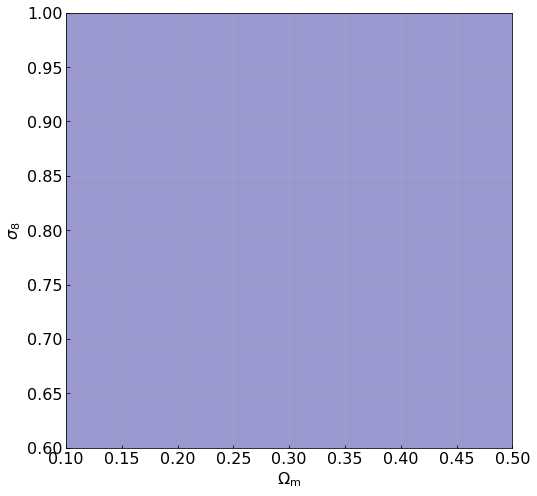

In [8]:
## TODO: Replace the first value with 1 sigma threshold, second with 2 sigma 

threshold_list = [0, 0]



## End of TODO

## TODO: Change the color

color = 'darkblue'



## End of TODO

## Plot 1 sigma contour with plt.contourf (filled)
plt.contourf(Omega_m_arr, sigma_8_arr, like_grid, levels=[threshold_list[0], float('inf')], 
             colors=[color], alpha=0.4)

## Plot 2 sigma contour with plt.contour (unfilled)
plt.contour(Omega_m_arr, sigma_8_arr, like_grid, levels=[threshold_list[1]], 
            colors=[color], linestyles=['-'], alpha=0.8)

## Labels, always!
plt.xlabel(r'$\Omega_\mathrm{m}$')
plt.ylabel(r'$\sigma_8$');

Fantastic! Let's interpret this plot: the true parameters lie in the shaded region with 68.3% of chance and in the solid contour with 95.4%.

This is not yet everything.
Imagine now an arrogant cosmologist comes into the classroom and says:

> I don't care about $\sigma_8$. 
> Just show me what your constraint on $\Omega_\mathrm{m}$ is!

Panic? Fear not!
The guy is actually asking for $P(\Omega_\mathrm{m})$, 
and since we have the joint pdf $P(\Omega_\mathrm{m}, \sigma_8)$,
$P(\Omega_\mathrm{m})$ is nothing but $\int P(\Omega_\mathrm{m}, \sigma_8)\ \mathrm{d}\sigma_8$.
This is called the _marginalization_.

### 3.8 Marginalization

In our case, $P(\Omega_\mathrm{m}, \sigma_8)$ is just `like_grid`. 
Now let's marginalize over `sigma_8` and draw it.
Make sure that you are summing on the correct axis.

**TODO: Draw the marginalized distribution for `Omega_m`**

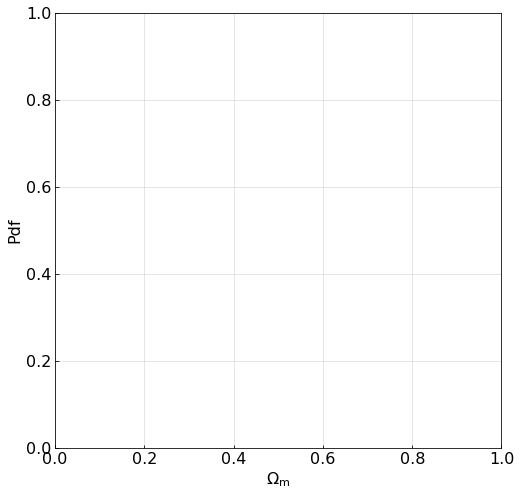

In [9]:
## TODO: Add your code here for marginalization





## End of TODO

## Labels
plt.xlabel(r'$\Omega_\mathrm{m}$')
plt.ylabel('Pdf');

### 3.9 Corner plot

Now let's plot the marginal for `sigma_8` as well. 
Copy codes from Questions 3.7 and 3.8 and put all plots in the indicated places.
This is what we call a _corner plot_.

**TODO:**
- Copy `plt.plot` from Question 3.7 to the indicated place
- Copy `plt.contour` and `plt.contourf` from Question 3.8 to the indicated place
- Plot the `sigma_8` marginal

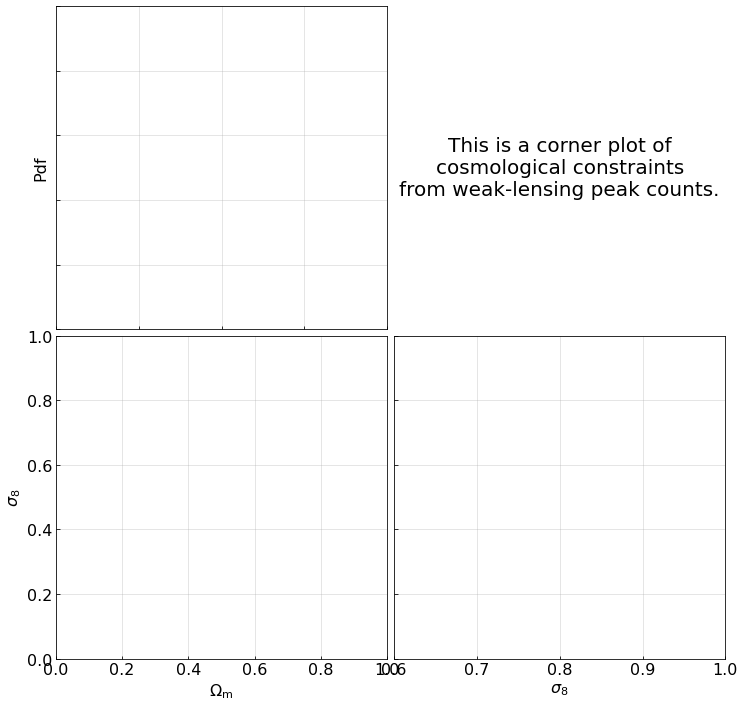

In [10]:
fig = plt.figure(figsize=(12, 12))
fig.add_subplot(2, 2, 1)

## TODO: Copy here plt.plot from Question 3.7





## End of TODO

## Layout
plt.xlim(Omega_m_arr[0], Omega_m_arr[-1])
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.ylabel('Pdf')

fig.add_subplot(2, 2, 2)

plt.annotate('This is a corner plot of\ncosmological constraints\nfrom weak-lensing peak counts.', 
             (0.5, 0.5), ha='center', va='center', size=20)
plt.gca().set_axis_off()

fig.add_subplot(2, 2, 3)

## TODO: Copy here plt.contour and plt.contourf from Question 3.8





## End of TODO

## Layout
plt.xlabel(r'$\Omega_\mathrm{m}$');
plt.ylabel(r'$\sigma_8$')

fig.add_subplot(2, 2, 4)

## TODO: Add your code here for sigma_8 marginal





## End of TODO

## Layout
plt.xlim(sigma_8_arr[0], sigma_8_arr[-1])
plt.gca().set_yticklabels([])
plt.xlabel(r'$\sigma_8$')
plt.subplots_adjust(wspace=0.02, hspace=0.02);

Please take a few seconds to enjoy your marvelous performance!
You know evreything about the principle of parameter inference now.

When the number of parameters is more than 2, 
we visualize the marginal of every parameter and the contours of every couple of parameters.
On a well-organized figure, the panels can only occupy the bottom-left corner.
That's why we call it a corner plot.

Last comment in this section: 
we have built our constraints from the likelihood/posterior which was evaluated on a grid;
this is rather rare in reality. 
In general the number of parameters (only 2 in our case) can range from a handful to hundreds,
where the grid evaluation is impossible (curse of dimensionality).
What people do in practice is to sample smartly the likelihood/posterior distribution,
and reconstruct it afterward.

As studying "sampling and density estimation" can require a consequent amount of time, 
we will leave this interesting topic for the future.